In [204]:
!pip install docx2txt

In [205]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
%cd
%ls

/root
'IMG\File_Type_Bar.png'   model_svm.pkl   tfidf_vector.pkl
'IMG\Per_File_Pai.png'    nltk_data/


In [208]:
os.listdir(r'/content/drive/MyDrive/Dataset/Resumes_Docx')

['SQL Developer',
 'workday',
 'Peoplesoft Resume',
 'Peoplesoft',
 'React Developer']

In [209]:
file_path   = r'/content/drive/MyDrive/Dataset/Resumes_Docx/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [210]:

print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 53


In [211]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  80


In [212]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

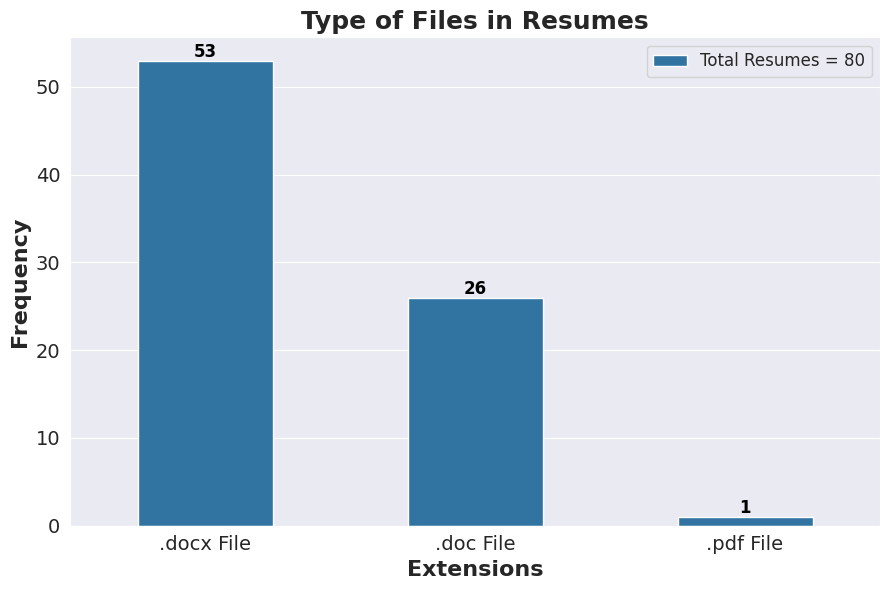

In [213]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

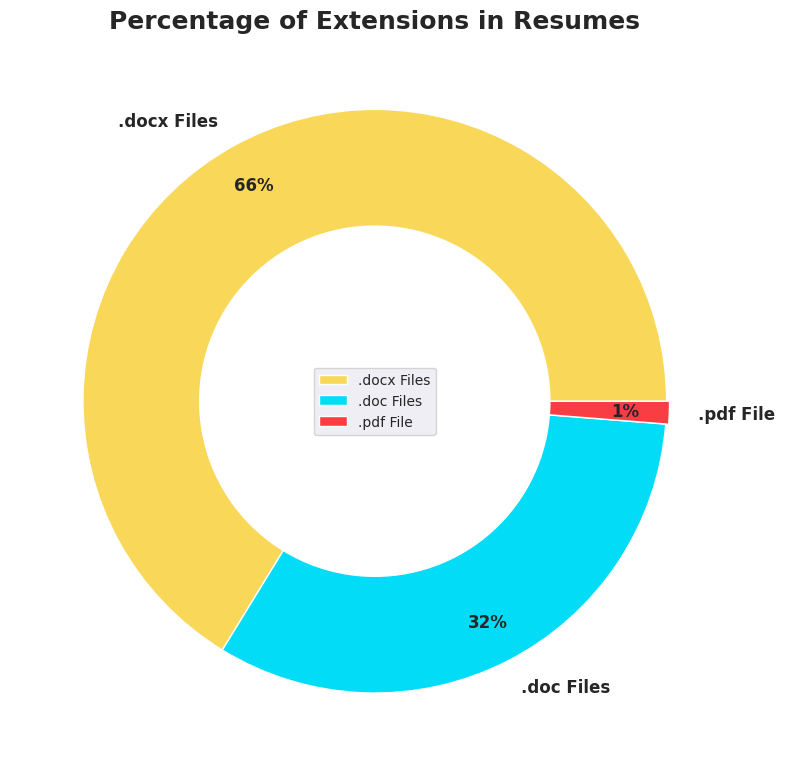

In [214]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [215]:

file_path = r'/content/drive/MyDrive/Dataset/Resumes_Docx/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [216]:

resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,SQL Developer,premsai.docx
1,SQL Developer,Tatikonda Kiran Kumar.doc
2,SQL Developer,Rajupavanakumari[2_10].docx
3,SQL Developer,Anil kumar.docx
4,SQL Developer,PSyamKumar[2_3].docx
...,...,...
75,React Developer,React Developer_Haripriya.docx
76,React Developer,React Developer_Thirupathiamma.docx
77,React Developer,React Dev_Krishna Kanth_Musquare Technologies....
78,React Developer,Reactjs Developer_M Lokesh Babu_Musquare Techn...


In [217]:
resume_data.Profile.value_counts().index

Index(['React Developer', 'workday', 'Peoplesoft Resume', 'SQL Developer',
       'Peoplesoft'],
      dtype='object', name='Profile')

In [218]:
resume_data.Profile.value_counts()

,count
Profile,
React Developer,24
workday,21
Peoplesoft Resume,20
SQL Developer,14
Peoplesoft,1


In [219]:
## Data Exploration

In [220]:
resume_data = pd.read_csv('/content/Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [221]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [222]:
!pip install -U textblob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [224]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [225]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [226]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [227]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [228]:

df_ngram.head(20)

,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
5,358,server
6,331,data
7,326,reports
8,323,project
9,280,sql


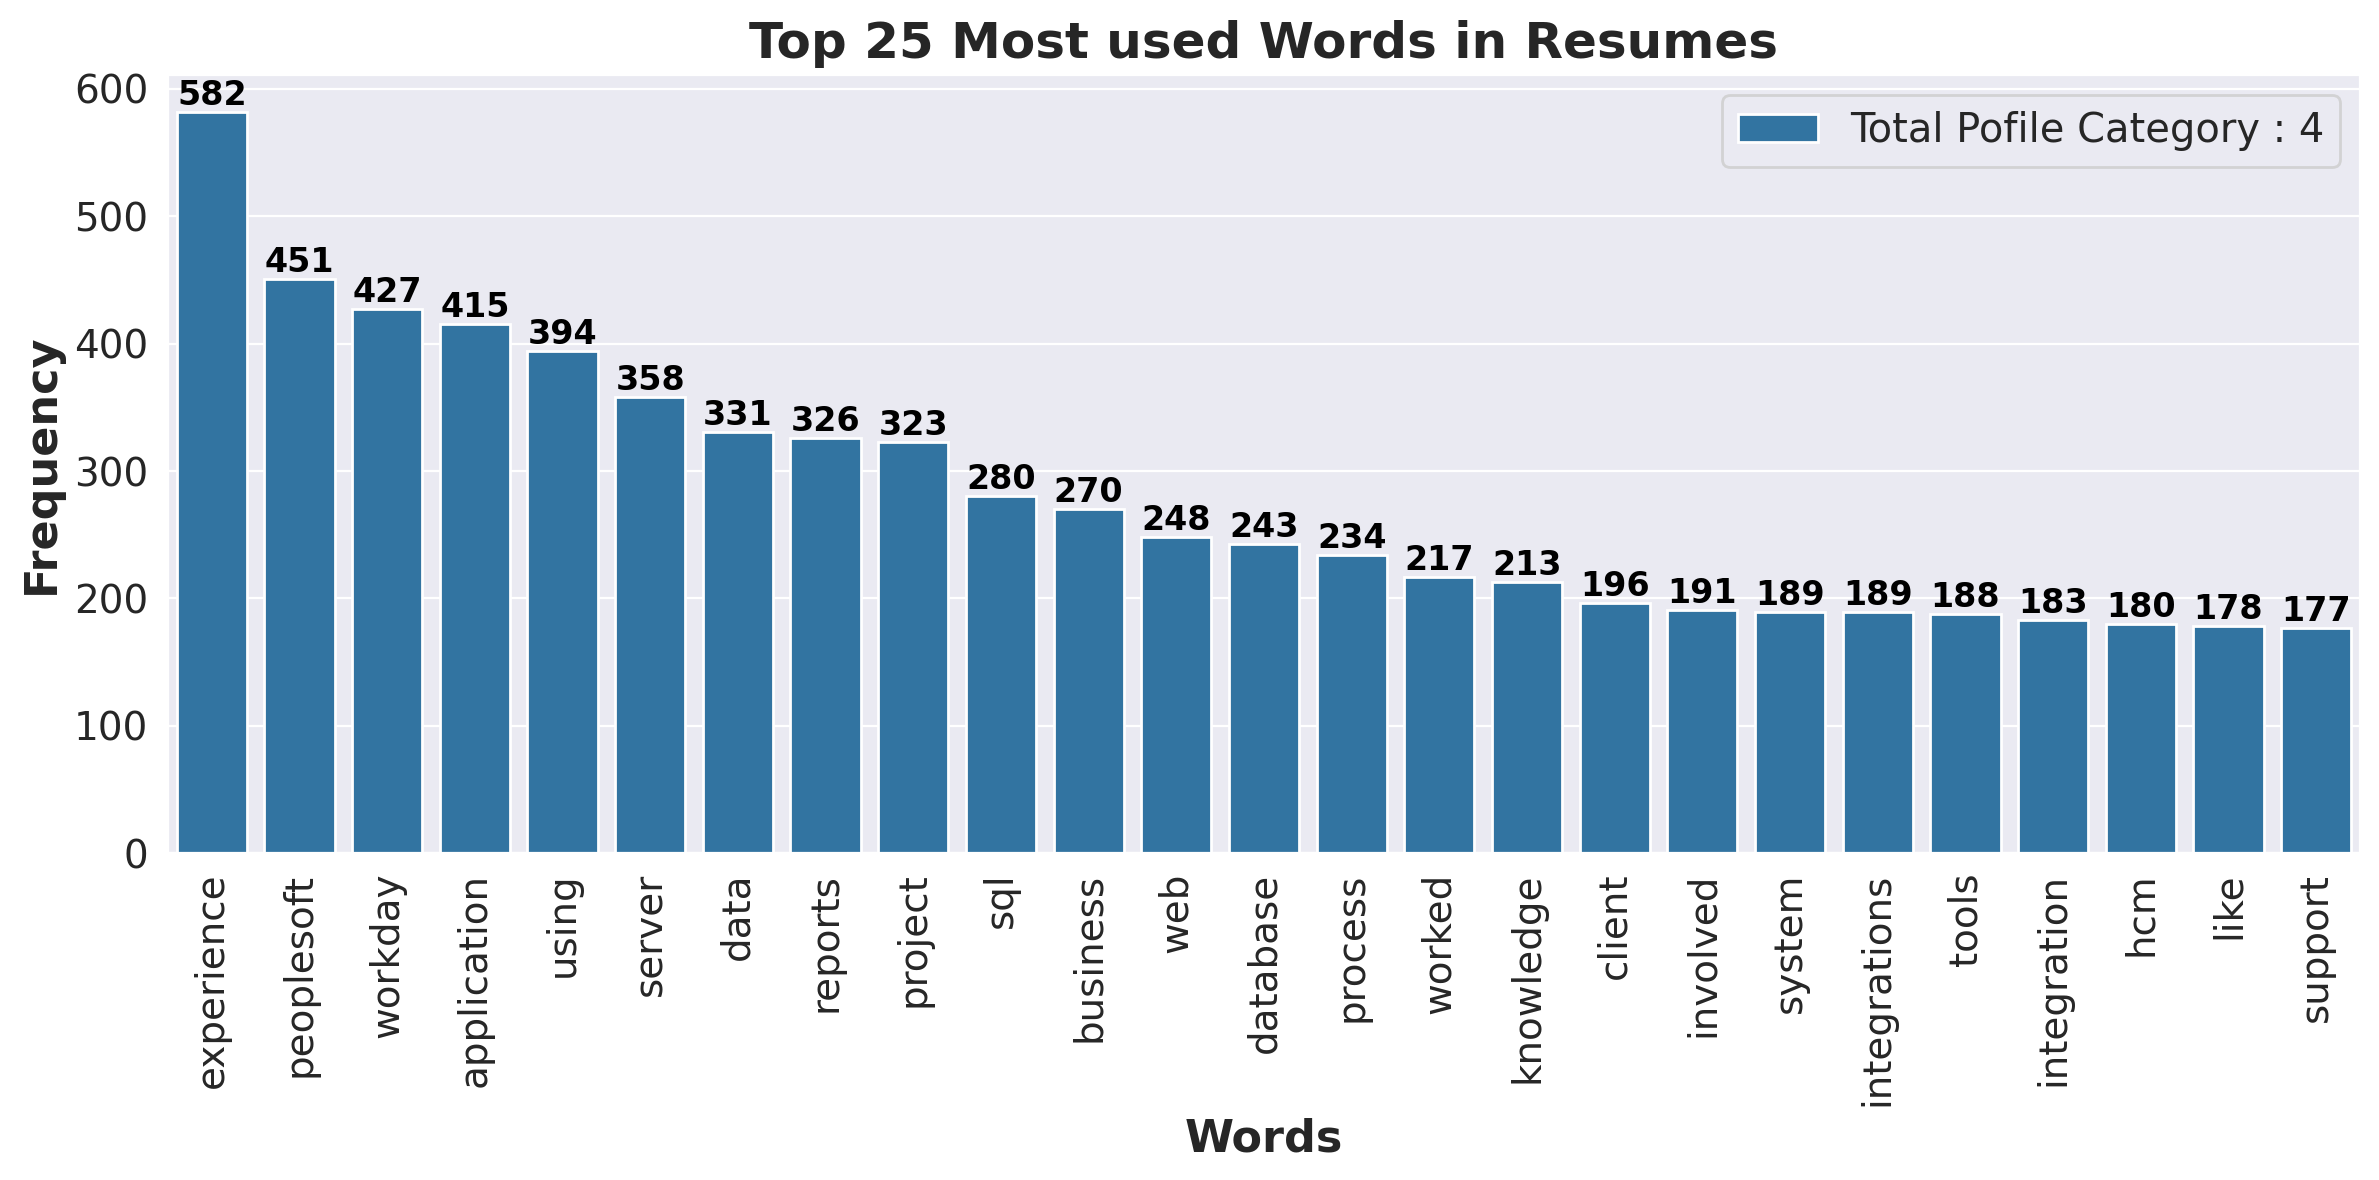

In [229]:

fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


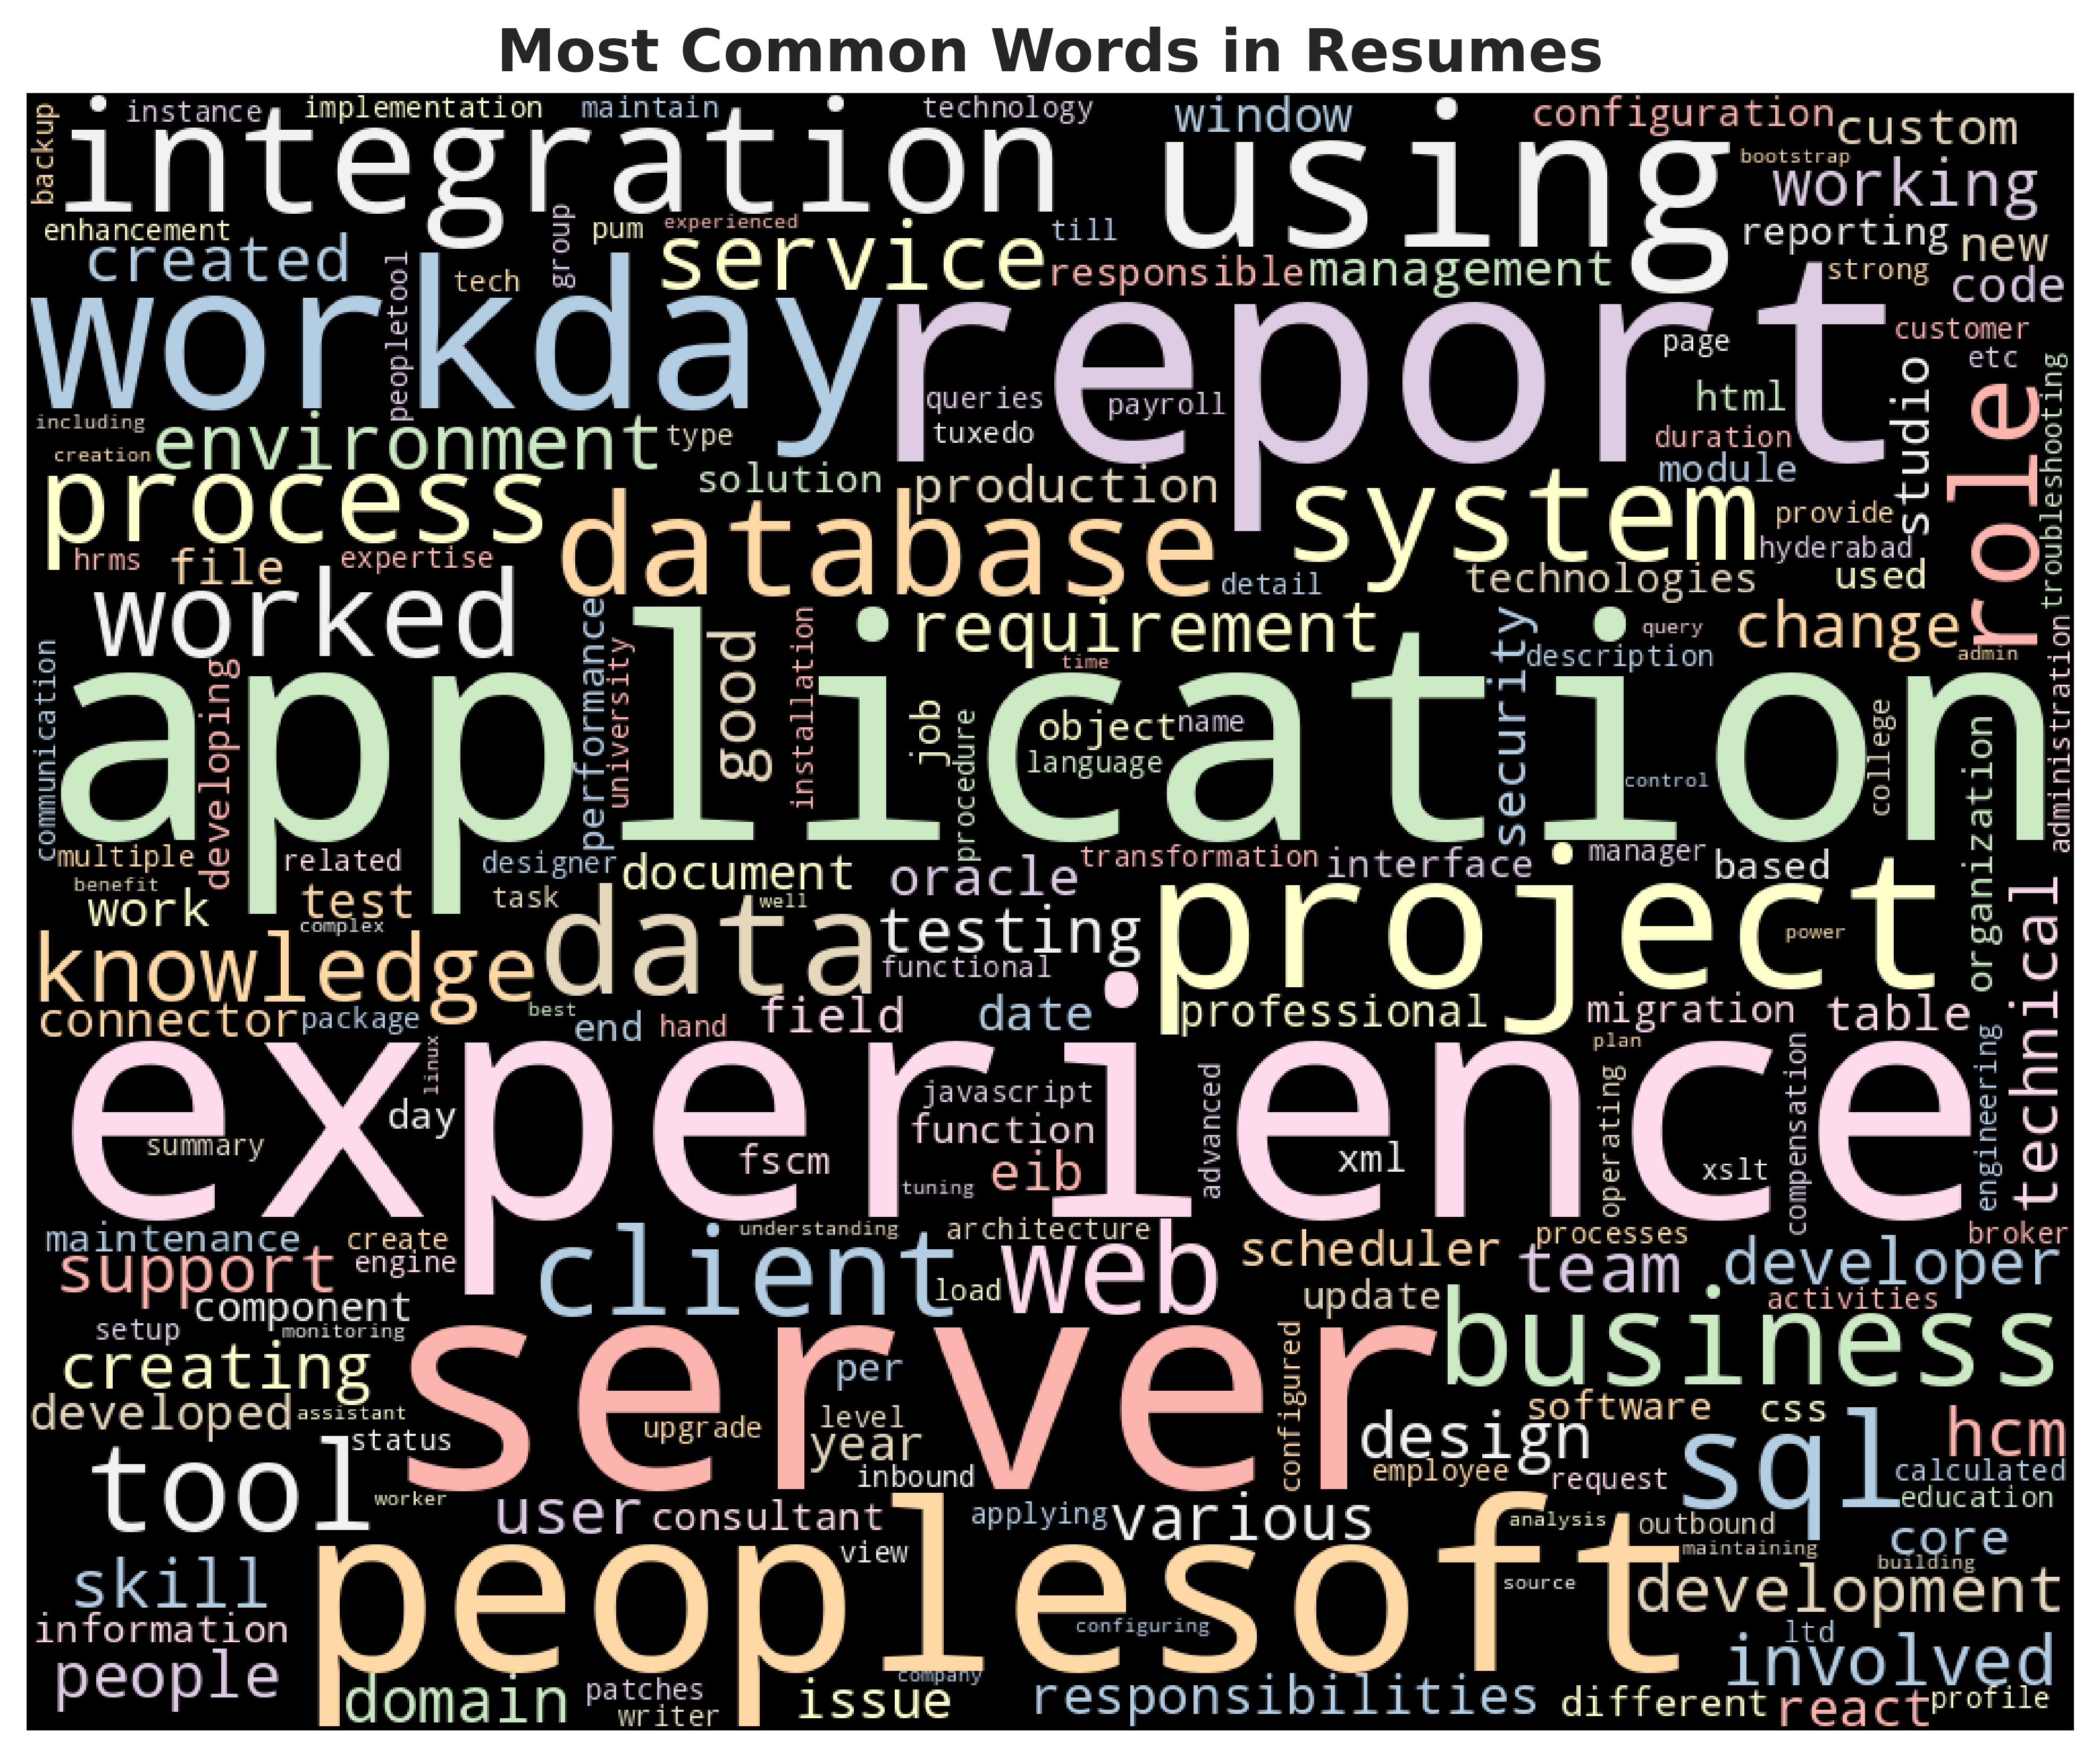

In [230]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [231]:
## Model Building

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [233]:
resume_data = pd.read_csv('/content/Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...


In [234]:
## Label Encoding

In [235]:
from sklearn.preprocessing import LabelEncoder

In [236]:
Le = LabelEncoder()
resume_data['LabelEncoding'] = Le.fit_transform(resume_data['Category'])
resume_data

,Category,Resume_Details,LabelEncoding
0,PeopleSoft,anubhav kumar singh work globally competitive ...,0
1,PeopleSoft,ananda rayudu profile summary years experience...,0
2,PeopleSoft,peoplesoft database administrator gangareddy p...,0
3,PeopleSoft,classification internal murali experience summ...,0
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,Workday,workday integration consultant name sri krishn...,3
75,Workday,seeking suitable positions workday hcm techno ...,3
76,Workday,workday hcm fcm name role kumar workday consul...,3
77,Workday,venkateswarlu workday consultant professional ...,3


In [237]:
resume_data.describe()

,LabelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [238]:
resume_data.isnull().sum()

,0
Category,0
Resume_Details,0
LabelEncoding,0


In [239]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [240]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((63,), (63,), (16,), (16,))

In [241]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [242]:
x_train_tfidf = tfidf_vector.fit_transform(x_train)

In [243]:
x_train_tfidf.shape

(63, 3690)

In [244]:
## Support Vector Machine

In [245]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


In [246]:
model_svm = SVC()
model_svm.fit(x_train_tfidf, y_train)

SVC()

In [247]:
prediction = model_svm.predict(x_train_tfidf)
prediction


array(['Workday', 'Workday', 'SQL Developer', 'React JS Developer',
       'PeopleSoft', 'Workday', 'PeopleSoft', 'SQL Developer',
       'React JS Developer', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'React JS Developer',
       'SQL Developer', 'Workday', 'PeopleSoft', 'SQL Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'PeopleSoft',
       'PeopleSoft', 'React JS Developer', 'PeopleSoft', 'Workday',
       'PeopleSoft', 'React JS Developer', 'Workday', 'Workday',
       'SQL Developer', 'Workday', 'PeopleSoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'SQL Developer',
       'React JS Developer', 'React JS Developer', 'Workday',
       'SQL Developer', 'PeopleSoft', 'React JS Developer', 'Workday',
       'Workday', 'Workday', 'Workday', 'React JS Developer',
       'React JS Developer', 'PeopleSoft', 'SQL Developer',
       'React JS Dev

In [248]:
accuracy_svm = accuracy_score(y_train, prediction)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train_tfidf, y_train)))
# Classification Report
print("Classification Report:")
print(classification_report(y_train, prediction))


Accuracy of training set : 1.00
Classification Report:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        15
React JS Developer       1.00      1.00      1.00        18
     SQL Developer       1.00      1.00      1.00        12
           Workday       1.00      1.00      1.00        18

          accuracy                           1.00        63
         macro avg       1.00      1.00      1.00        63
      weighted avg       1.00      1.00      1.00        63



In [249]:
## Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [252]:
prediction_rf = model_rf.predict(x_train_tfidf)
prediction_rf

array(['Workday', 'Workday', 'SQL Developer', 'React JS Developer',
       'PeopleSoft', 'Workday', 'PeopleSoft', 'SQL Developer',
       'React JS Developer', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'React JS Developer',
       'SQL Developer', 'Workday', 'PeopleSoft', 'SQL Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'PeopleSoft',
       'PeopleSoft', 'React JS Developer', 'PeopleSoft', 'Workday',
       'PeopleSoft', 'React JS Developer', 'Workday', 'Workday',
       'SQL Developer', 'Workday', 'PeopleSoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'SQL Developer',
       'React JS Developer', 'React JS Developer', 'Workday',
       'SQL Developer', 'PeopleSoft', 'React JS Developer', 'Workday',
       'Workday', 'Workday', 'Workday', 'React JS Developer',
       'React JS Developer', 'PeopleSoft', 'SQL Developer',
       'React JS Dev

In [253]:
accuracy_rf = accuracy_score(y_train,prediction_rf)
print('Accuracy of training set : {:.2f}'.format(model_rf.score(x_train_tfidf, y_train)))
# Classification Matrix
print("Classification Report:")
print(classification_report(y_train, prediction_rf))

Accuracy of training set : 1.00
Classification Report:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        15
React JS Developer       1.00      1.00      1.00        18
     SQL Developer       1.00      1.00      1.00        12
           Workday       1.00      1.00      1.00        18

          accuracy                           1.00        63
         macro avg       1.00      1.00      1.00        63
      weighted avg       1.00      1.00      1.00        63



In [254]:
## Logistic_Regression

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
model_lr = LogisticRegression()
model_lr.fit(x_train_tfidf, y_train)
prediction_lr = model_lr.predict(x_train_tfidf)
prediction_lr

array(['Workday', 'Workday', 'SQL Developer', 'React JS Developer',
       'PeopleSoft', 'Workday', 'PeopleSoft', 'SQL Developer',
       'React JS Developer', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'React JS Developer',
       'SQL Developer', 'Workday', 'PeopleSoft', 'SQL Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'React JS Developer',
       'SQL Developer', 'PeopleSoft', 'Workday', 'PeopleSoft',
       'PeopleSoft', 'React JS Developer', 'PeopleSoft', 'Workday',
       'PeopleSoft', 'React JS Developer', 'Workday', 'Workday',
       'SQL Developer', 'Workday', 'PeopleSoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'SQL Developer',
       'React JS Developer', 'React JS Developer', 'Workday',
       'SQL Developer', 'PeopleSoft', 'React JS Developer', 'Workday',
       'Workday', 'Workday', 'Workday', 'React JS Developer',
       'React JS Developer', 'PeopleSoft', 'SQL Developer',
       'React JS Dev

In [257]:
accuracy_lr = accuracy_score(y_train,prediction_lr)
print('Accuracy of training set : {:.2f}'.format(model_rf.score(x_train_tfidf, y_train)))
# Classification Matrix
print("Classification Report:")
print(classification_report(y_train, prediction_lr))

Accuracy of training set : 1.00
Classification Report:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        15
React JS Developer       1.00      1.00      1.00        18
     SQL Developer       1.00      1.00      1.00        12
           Workday       1.00      1.00      1.00        18

          accuracy                           1.00        63
         macro avg       1.00      1.00      1.00        63
      weighted avg       1.00      1.00      1.00        63



In [258]:
## Pipeline

In [259]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [260]:
text_ppl = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model_svm', SVC()),
                     ])
text_ppl.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model_svm', SVC())])

In [261]:
prediction_ppl = text_ppl.predict(x_test)
prediction_ppl

array(['React JS Developer', 'PeopleSoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'PeopleSoft', 'Workday', 'PeopleSoft', 'PeopleSoft',
       'SQL Developer', 'React JS Developer', 'Workday',
       'React JS Developer', 'Workday', 'SQL Developer'], dtype=object)

In [262]:
from sklearn import metrics

In [263]:
print("Classification Report For SVC Model")
print(metrics.classification_report(y_test, prediction_ppl))

Classification Report For SVC Model
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.94        16
         macro avg       0.96      0.95      0.95        16
      weighted avg       0.95      0.94      0.94        16



In [264]:
print("Accuracy Score For SVC Model")
print(metrics.accuracy_score(y_test, prediction_ppl))

Accuracy Score For SVC Model
0.9375


In [265]:
print("Confusion matrix For SVC Model")
print(metrics.confusion_matrix(y_test, prediction_ppl))

Confusion matrix For SVC Model
[[4 1 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [266]:
text_ppl_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model_rf', RandomForestClassifier(n_estimators=200)),
                     ])
text_ppl_rf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model_rf', RandomForestClassifier(n_estimators=200))])

In [267]:
prediction_ppl_rf = text_ppl.predict(x_test)
prediction_ppl_rf

array(['React JS Developer', 'PeopleSoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'PeopleSoft', 'Workday', 'PeopleSoft', 'PeopleSoft',
       'SQL Developer', 'React JS Developer', 'Workday',
       'React JS Developer', 'Workday', 'SQL Developer'], dtype=object)

In [268]:
print("Classification Report For Random Forest Model")
print(metrics.classification_report(y_test, prediction_ppl_rf))

Classification Report For Random Forest Model
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.94        16
         macro avg       0.96      0.95      0.95        16
      weighted avg       0.95      0.94      0.94        16



In [269]:
print("Accuracy Score For Random Forest Model")
print(metrics.accuracy_score(y_test, prediction_ppl_rf))

Accuracy Score For Random Forest Model
0.9375


In [270]:
print("Confusion matrix For Random Forest Model")
print(metrics.confusion_matrix(y_test, prediction_ppl_rf))

Confusion matrix For Random Forest Model
[[4 1 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]
